In [1]:
# Importing numerical computation libraries
import numpy as np
import pandas as pd
import math

# Visualization libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import  RobustScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor 

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

## Data Loading

In [2]:
df=pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Business Understanding:

Diamond is one of the strongest and the most valuable substances produced naturally as a form of carbon. However, unlike gold and silver, determining the price of a diamond is very complex because many features are to be considered for determining its price. The value of diamonds depends upon their structure, cut, inclusions (impurity), carats, and many other features. The uses of diamonds are many, such as in industries, as they are effective in cutting, polishing, and drilling. Since diamonds are extremely valuable, they have been traded across different countries for centuries now and this trade only increases with time. They are graded and certified based on the "four Cs", which are color, cut, clarity, and carat. These are the only metrics that are being used to the quality of diamonds and sets the price of the diamond. This metric allows uniform understanding for people across the world to buy diamonds, which allows ease of trade and value for what is purchased.

## Problem Statement

The objective of this project is to analyze and model diamond prices based on their physical and quality attributes.
The dataset contains information about diamonds, including carat weight, cut, color, clarity, depth, table, dimensions, and price.

**The primary goals of this project is to**:

1. Understand the structure and characteristics of the diamond dataset through exploratory data analysis.
2. Identify key factors that influence diamond prices, such as carat, cut, color, and clarity.
3. Analyze relationships and interactions between numerical and categorical features.
4. Detect patterns, trends, and correlations that explain price variability.
5. Prepare the data for predictive modeling by cleaning, preprocessing, and feature engineering

The project aims is to build and evaluate machine learning models capable of predicting diamond prices accurately and deploy the final model for practical use.

## Data Cleaning and Manipulation

In [3]:
# Display first 5 rows
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Checking Dimensions
df.shape

(53940, 10)

In [5]:
# Understanding data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
# Statistical summary of numerical features
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### Observations:

- There are nearly 53940 data points with 10 features.
- Almost all the numerical features are normally distributed except the price as the better quality diamond will have higher price as comapred to that of lowered quality diamonds.
- The x, y, and z features contain zero values, suggesting invalid entries that require further data cleaning.

In [7]:
# Checking for missing values 
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# Renaming x,y,z and depth features name 
df = df.rename(columns = {"depth":"depth_percentage"})
df = df.rename(columns={'x': 'length', 'y': 'width', 'z': 'depth'})
df.head()

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
# dealing with zero values in all num columns
df_zero = df.loc[(df[["length", "width", "depth"]] == 0).any(axis=1)]
df_zero.head()

,carat,cut,color,clarity,depth_percentage,table,price,length,width,depth
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0


In [10]:
len(df_zero) 

20

#### Observations:

- There are 20 data points which have 0 in one or the another column. Since the no. of data points with 0 are very less compared to the total number of data points deleting them wont effect the data.
- Deleting all the data points containing 0.

In [11]:
df = df.drop(index = df_zero.index)
df.shape

(53920, 10)

## Exploratory Data Analysis (EDA)

### Distribution of Categorical columns

In [12]:
cat_cols = df.select_dtypes(include = 'O')

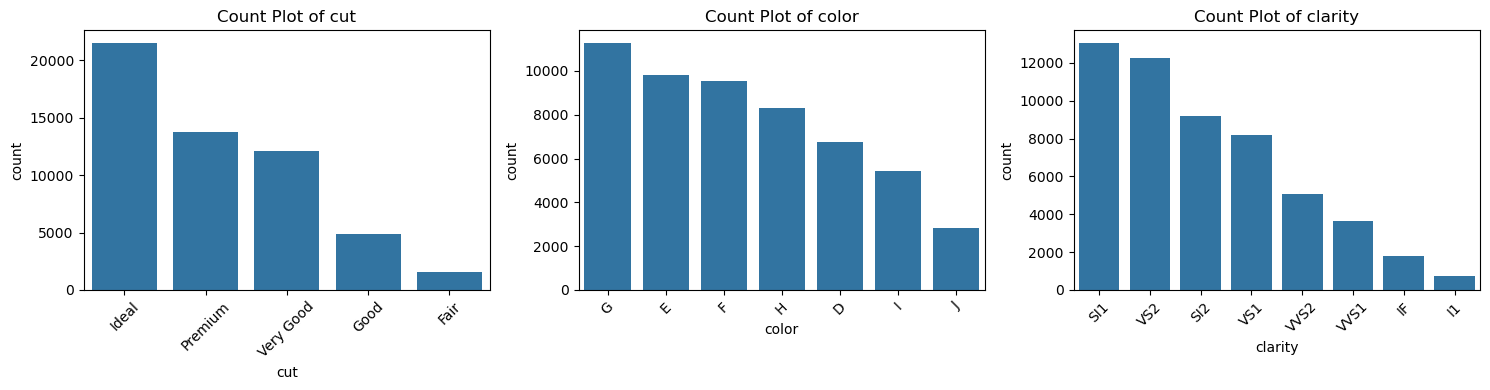

In [13]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Observations:

- Ideal cut diamonds are the most frequent in the dataset, followed by Premium and Very Good cuts.
- Good and Fair cuts are significantly less common.
- Diamonds with color grades (G, E, F, H) dominate the dataset.
- Color grades (D,I,J) appear less frequently.
- SI1 and VS2 clarity grades are the most common, followed by SI2 and VS1.
- IF, VVS1and I1 are relatively rare.

### Distribution of Numerical columns

In [14]:
num_cols = df.select_dtypes(include = "number").columns
num_cols

Index(['carat', 'depth_percentage', 'table', 'price', 'length', 'width',
       'depth'],
      dtype='object')

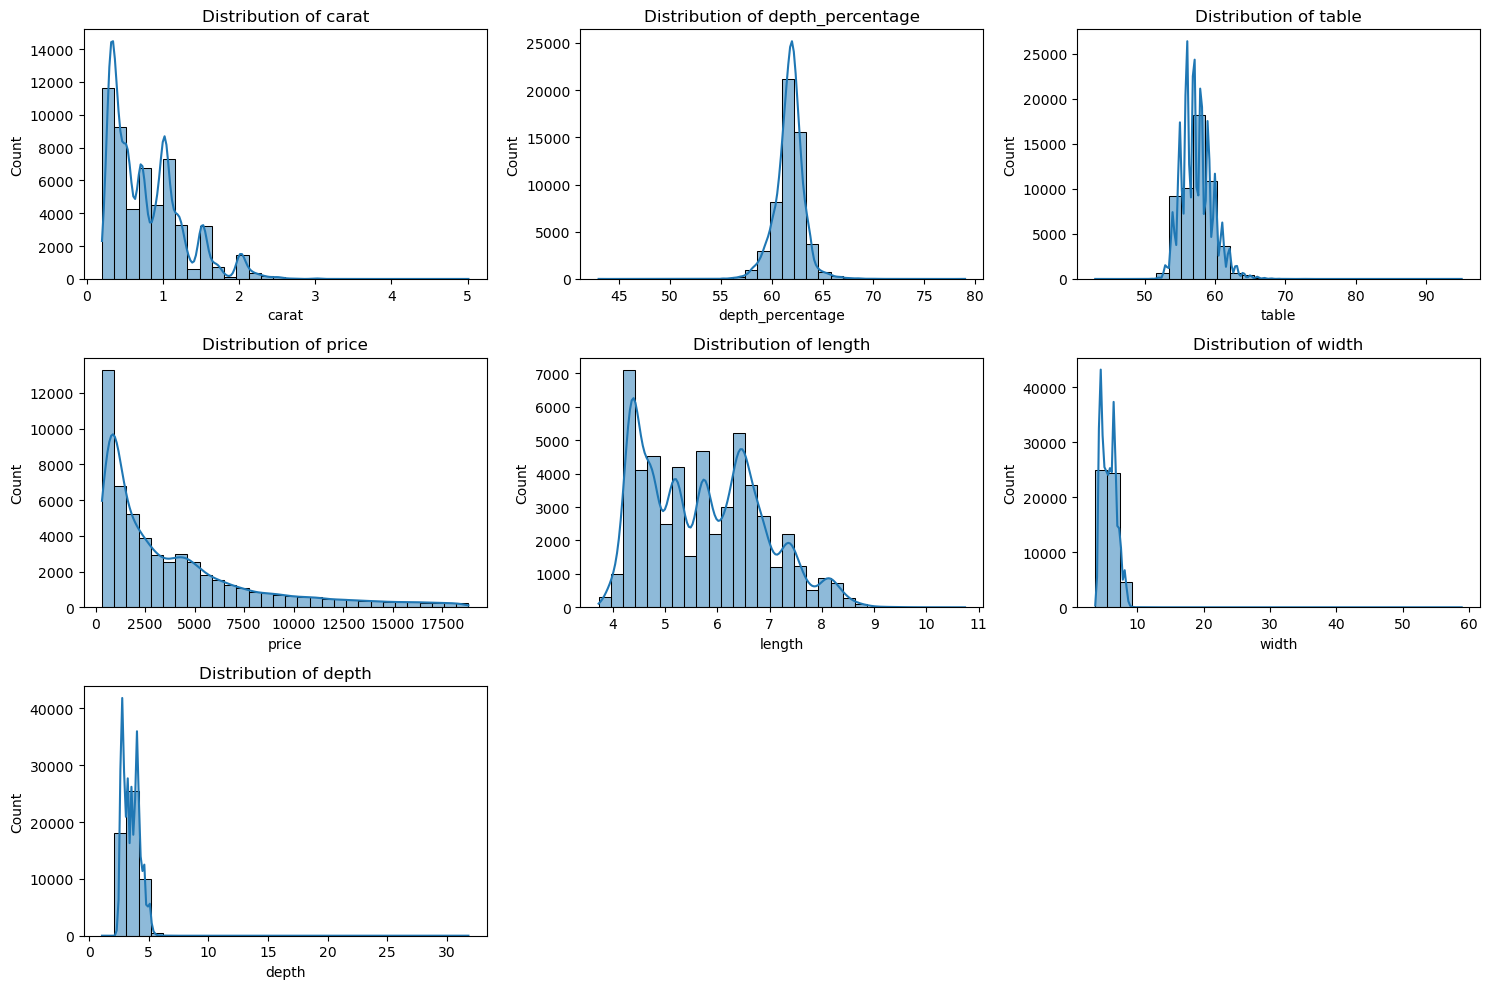

In [15]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

#### Observations:
1. Carat Distribution:
- carat distribution is right skewed, with most diamonds concentrated below 1 carat.
- Very few diamonds above 2 carat. Multimodal pattern observed.
- Presence of outilers at higher carat values.
  
2. Depth Percentage Distribution:
- Depth percentage is near to normal distribution and data is centered around 60%-63%.

3. Table Distribution:
- Multimodal pattern is observed in table distribution and values clusters between 55-60.

4. Price Distribution:
- Price distribution highly right-skewed, with a long tail extending to very high prices.
- Majority of diamonds fall in the lower price range, while expensive diamonds are rare.
- Extreme values indicate potential outliers.

5. Length Distribution:
- Multimodal pattern is observed and most values fall between 4 and 7 units.
- slight outliers.

6. Width Distribution:
- Multimodal pattern is observed  and values are tightly clustered around a narrower range, with extreme values stretching the axis.
- A few extreme values suggest possible outliers.

7. Depth Distribution:
- Depth values exhibit a multimodal pattern, with most observations concentrated in a limited range.
- Several extreme values indicate possible outliers.

### Price vs Carat

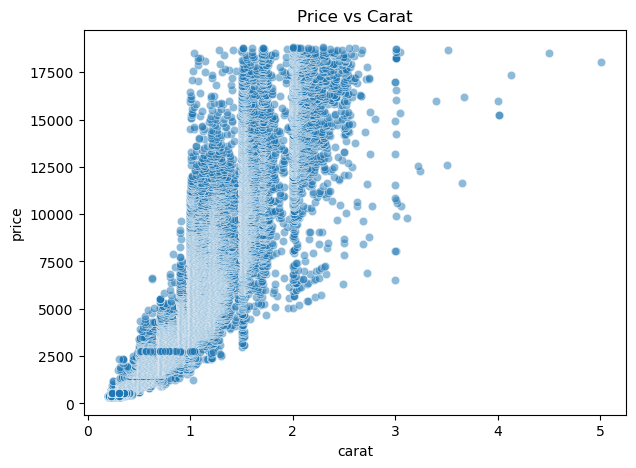

In [16]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='carat', y='price', data=df, alpha=0.5)
plt.title('Price vs Carat')
plt.show()

#### Observations:
- Most of the data points are concentrated between 0 and 3 carats.
- A strong positive relationship is observed between carat and price; price increases as carat increases.
- The relationship is non-linear, with price variability increasing at higher carat values.
- Vertical spread at similar carat levels suggests that factors such as cut, color, and clarity also influence price.

### Price vs Carat by Cut

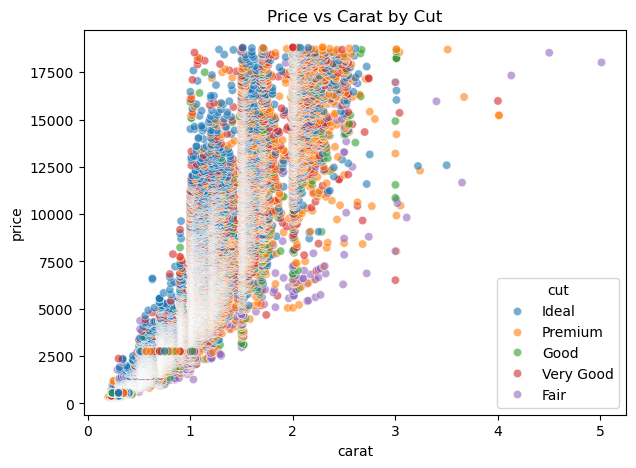

In [17]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x='carat', y='price', hue='cut', data=df, alpha=0.6)
plt.title('Price vs Carat by Cut')
plt.show()

#### Observations:
- A strong positive relationship exists between carat and price across all cut categories.
- For a given carat value, diamonds with higher-quality cuts (Ideal and Premium) generally command higher prices.
- Significant vertical spread within the same carat range indicates that cut plays an important role in price variation.
- Lower-quality cuts (Fair and Good) tend to appear more frequently at lower price levels for similar carat sizes.
- Price variability increases as carat increases, regardless of cut category.

### Price Distribution Across Categories

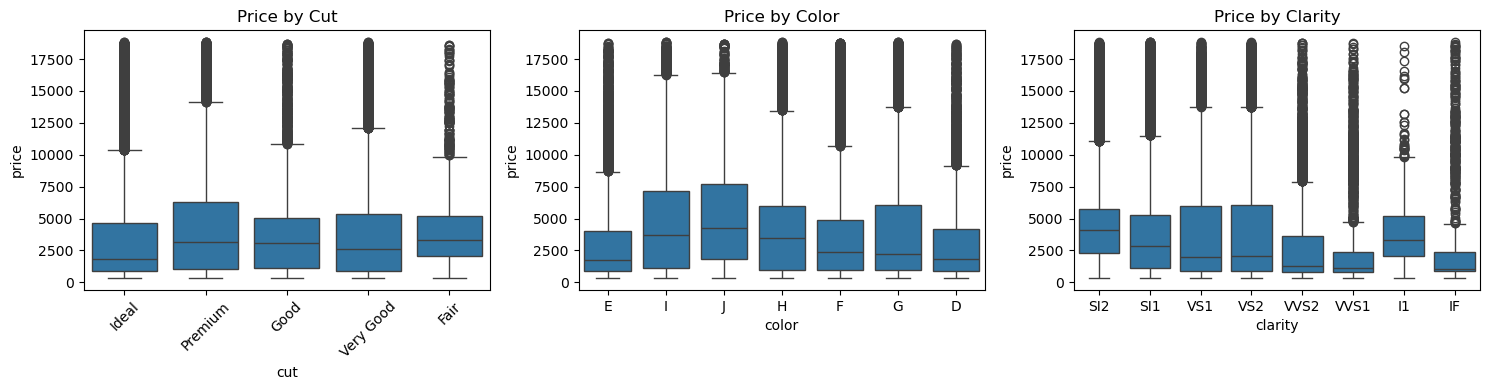

In [18]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='price', data=df)
plt.title('Price by Cut')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='color', y='price', data=df)
plt.title('Price by Color')

plt.subplot(1, 3, 3)
sns.boxplot(x='clarity', y='price', data=df)
plt.title('Price by Clarity')

plt.tight_layout()
plt.show()

#### Observations:

1. Price by Cut:
- Median price varies across cut categories, indicating that cut influences diamond pricing.
- Premium, Good and Fair cuts show higher median prices compared to Ideal and Very Good.
- Significant price overlap across cuts suggests that cut alone does not determine price.
- Presence of numerous high-price outliers across all cut categories.

2. Price by Color:
- Diamonds with color grades (e.g., J, H, I) show higher median prices than other grades.
- Price distributions overlap substantially across color categories.
- Numerous outliers indicate high price variability within each color grade.

3. Price by Clarity:
- Clarity grades  (e.g., IF, VVS1, VVS2) contain several high-priced outliers but do not necessarily have the highest median prices.
- Lower clarity grades generally show lower median prices, though substantial overlap exists across clarity categories.
- The overlap and non-monotonic medians suggest that clarity interacts strongly with other factors such as carat and cut.

### Correlation Analysis (Numerical Features)

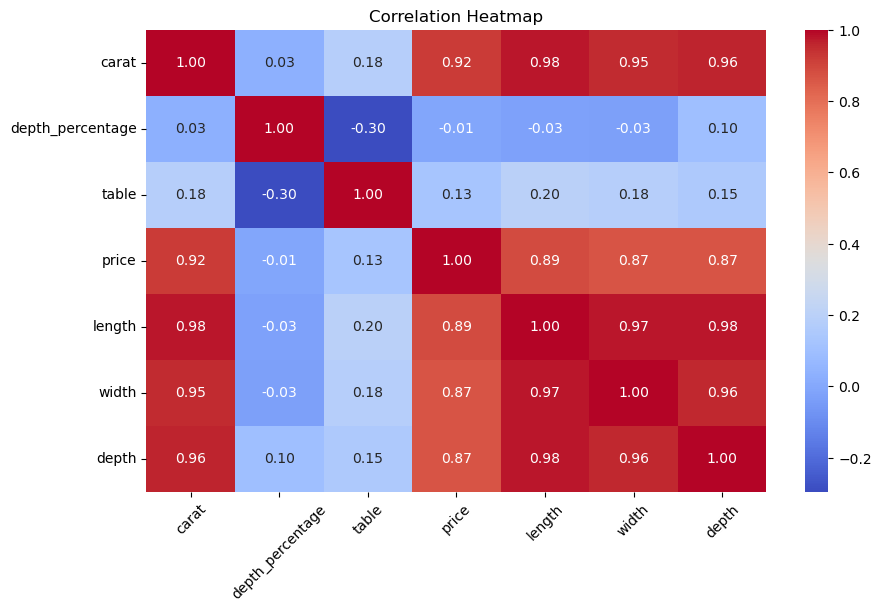

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation = 45)
plt.show()

#### Observations:

- Carat shows a very strong positive correlation with price, indicating that carat is the primary driver of diamond pricing.
- Physical dimensions (length, width, depth) are highly correlated with carat and with each other, suggesting strong multicollinearity.
- Depth percentage exhibits near-zero correlation with price, implying limited direct influence on pricing.
- Table shows a weak positive correlation with price and a moderate negative correlation with depth percentage.

## Preprocessing

In [20]:
# Separating input and target features
x = df.drop('price', axis = 1)
y = df['price']

### Label Encoding

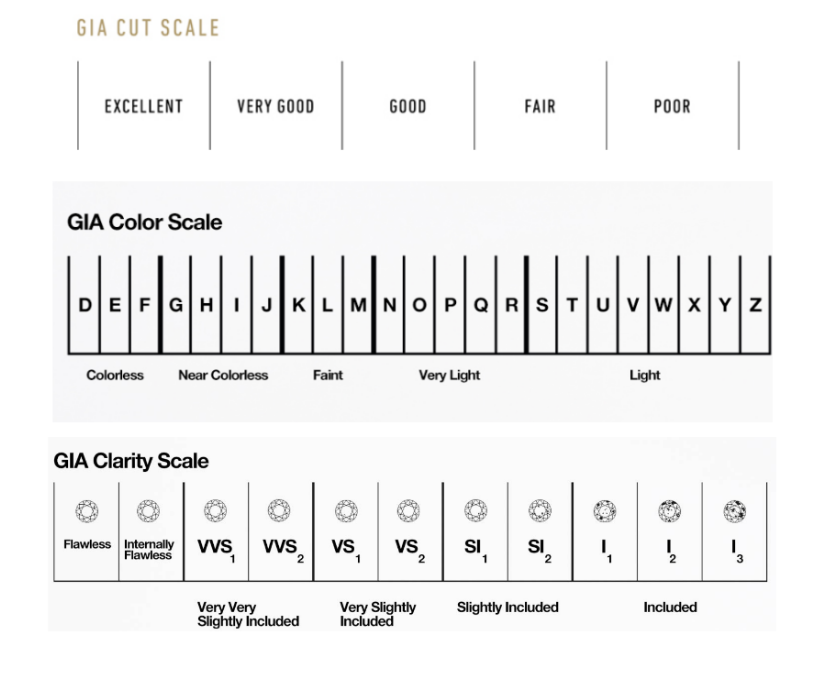

Based on GIA standards, cut, color, and clarity exhibit a natural ordinal hierarchy.FOr modeling, these features would be encoded using ordinal encoding after the train–test split to preserve order and prevent data leakage.

In [21]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=69)

In [22]:
df['cut'].value_counts()

cut
Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: count, dtype: int64

In [23]:
df['color'].value_counts()

color
G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: count, dtype: int64

In [24]:
df['clarity'].value_counts()

clarity
SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: count, dtype: int64

In [25]:
# Create an OrdinalEncoder to convert ordered categorical features into numeric values
# The order reflects increasing quality/grade for each feature

encoder = OrdinalEncoder(categories=[
    # Cut quality from lowest to highest
    ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'],
    
    # Color grade from worst (J) to best (D)
    ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
    
    # Clarity grade from lowest to highest
    ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
])

In [26]:
# Fit the OrdinalEncoder on the training data and transform
# the ordered categorical features (cut, color, clarity) into numerical values
x_train[['cut', 'color', 'clarity']] = encoder.fit_transform(x_train[['cut', 'color', 'clarity']])


# Use the already-fitted encoder to transform the test data
# (important to avoid data leakage)
x_test[['cut', 'color', 'clarity']] = encoder.transform( x_test[['cut', 'color', 'clarity']])

## Decision Tree Regressor

In [27]:
# Initialize KNN Regressor
dt = DecisionTreeRegressor()

# Train the model on the training dataset
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [28]:
# Generate predictions on the test dataset using the DT model
y_pred_dt = dt.predict(x_test)

In [29]:
# Create a Series for predicted values to align them with actual test labels for evaluation
y_pred_series_dt = pd.Series(y_pred_dt, index=y_test.index)

In [30]:
# Combine actual and predicted values into a single DataFrame for comparison
result_dt = pd.concat([y_test, y_pred_series_dt], axis=1)
result_dt.columns = ["Actual", "Predicted"]  # Rename columns for clarity
result_dt

,Actual,Predicted
48271,1956,1627.0
45703,1698,1669.0
44432,1590,1652.0
7954,4320,4939.0
52523,2528,2330.0
...,...,...
25215,13813,13939.0
52597,2542,2395.0
25499,14294,14199.0
32430,792,725.0


In [31]:
# Calculating Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test,y_pred_series_dt)
mae_dt

361.14672972304646

In [32]:
# Calculating Mean Squared Error
mse_dt = mean_squared_error(y_test,y_pred_series_dt)
mse_dt

549705.2872001731

In [33]:
# Calculating Root Mean Squared Error 
rmse_dt = root_mean_squared_error(y_test,y_pred_series_dt)
rmse_dt

741.4211267560246

#### Error Analysis

- The Mean Absolute Error (MAE) of around 361.14 indicates that, on average, the predicted diamond price differs from the actual price by a relatively small margin.
- The Root Mean Squared Error (RMSE) of approximately 741.42, being higher than MAE, implies that the model occasionally makes larger errors, likely due to high-priced outliers in the dataset.
- Overall error values are reasonable when compared to the wide range of diamond prices, confirming reliable predictive performance.

In [34]:
# Generating predictions on the training data using the model
y_train_pred_dt = dt.predict(x_train)

In [35]:
# Calculating R² score for training data
r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_train_dt

0.999998354590111

In [36]:
# Calculating R² score for test data
r2_test_dt = r2_score(y_test,y_pred_series_dt)
r2_test_dt

0.965501567627847

#### Observations:

- The model achieved a high R² score of approximately 0.9655 on the test dataset, indicating that it explains nearly 96.55% of the variance in diamond prices.
- The training R² score is extremely high (0.9999), showing that the model fits the training data almost perfectly.
- The difference between training and testing R² scores suggests the presence of slight overfitting, which is a known characteristic of decision tree models.

#### Model Evaluation – Decision Tree Regression

- Evaluation Metrics (Test Data)

>Mean Absolute Error (MAE): 361.14

>Mean Squared Error (MSE): 549705.28

>Root Mean Squared Error (RMSE): 741.42

>R² Score (Test): 0.9655

- Training Performance

>R² Score (Train): 0.9999

## RandomForestRegressor

In [37]:
# Initialize KNN Regressor
rfr = RandomForestRegressor()

# Train the model on the training dataset
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
# Generate predictions on the test dataset using the DT model
y_pred_rfr = rfr.predict(x_test)

In [39]:
# Create a Series for predicted values to align them with actual test labels for evaluation
y_pred_series_rfr = pd.Series(y_pred_rfr, index=y_test.index)

In [40]:
# Combine actual and predicted values into a single DataFrame for comparison
result_rfr = pd.concat([y_test, y_pred_series_rfr], axis=1)
result_rfr.columns = ["Actual", "Predicted"]  # Rename columns for clarity
result_rfr

,Actual,Predicted
48271,1956,1868.37
45703,1698,1682.62
44432,1590,1637.18
7954,4320,4795.61
52523,2528,2387.69
...,...,...
25215,13813,13484.98
52597,2542,2598.93
25499,14294,13544.80
32430,792,837.03


In [41]:
# Calculating Mean Absolute Error (MAE)
mae_rfr = mean_absolute_error(y_test,y_pred_series_rfr)
mae_rfr

270.84176288063446

In [42]:
# Calculating Mean Squared Error
mse_rfr = mean_squared_error(y_test,y_pred_series_rfr)
mse_rfr

296564.48926522775

In [43]:
# Calculating Root Mean Squared Error 
rmse_rfr = root_mean_squared_error(y_test,y_pred_series_rfr)
rmse_rfr

544.5773492032401

#### Error Analysis
- The Mean Absolute Error (MAE) of approximately 270.33 indicates that, on average, the predicted diamond price differs from the actual price by a relatively small margin.
- The Root Mean Squared Error (RMSE) of approximately 544.30, being higher than MAE, suggests that the model occasionally makes larger prediction errors, likely due to high-priced or rare diamonds in the dataset.
- Overall error values are low when compared to the wide range of diamond prices, confirming highly reliable predictive performance.

In [44]:
# Generating predictions on the training data using the model
y_train_pred_rfr = rfr.predict(x_train)

In [45]:
# Calculating R² score for training data
r2_train_rfr = r2_score(y_train, y_train_pred_rfr)
r2_train_rfr

0.9974328339245483

In [46]:
# Calculating R² score for test data
r2_test_rfr = r2_score(y_test,y_pred_series_rfr)
r2_test_rfr

0.9813881906994047

#### Observations:
- The model achieved a very high R² score of approximately 0.9813 on the test dataset, indicating that it explains nearly 98.13% of the variance in diamond prices.
- The training R² score of 0.9974 shows that the model fits the training data extremely well.
- Compared to the Decision Tree model, Random Forest demonstrates better generalization and reduced overfitting, due to its ensemble-based learning approach.

#### Model Evaluation – Random Forest Regression

- Evaluation Metrics (Test Data)
  
 > Mean Absolute Error (MAE): 270.84

 > Mean Squared Error (MSE): 296564.48

 > Root Mean Squared Error (RMSE): 544.57

 > R² Score (Test): 0.9813

- Training Performance
  
> R² Score (Train): 0.9974

## Scaling For KNN And LinearRegression

In [47]:
# Create an instance
robust_scaler = RobustScaler()

In [48]:
# Identify numeric columns (exclude ordinal categorical features)
num_cols = x_train.drop(['cut', 'color', 'clarity'], axis=1).columns

# Copy original data
x_train_scal = x_train.copy()
x_test_scal = x_test.copy()

# Scale numeric columns
x_train_scal[num_cols] = robust_scaler.fit_transform(x_train[num_cols])
x_test_scal[num_cols] = robust_scaler.transform(x_test[num_cols])

# Final scaled training data (all columns preserved)
x_train_scal.head()

,carat,cut,color,clarity,depth_percentage,table,length,width,depth
25010,2.031250,1.0,0.0,3.0,-0.266667,2.000000,1.262295,1.302198,1.247788
32247,-0.609375,4.0,2.0,7.0,0.333333,-0.666667,-0.754098,-0.747253,-0.734513
50559,0.031250,3.0,2.0,2.0,0.600000,0.666667,-0.005464,0.010989,0.044248
34076,-0.531250,4.0,6.0,3.0,-0.533333,-0.333333,-0.606557,-0.593407,-0.637168
1076,-0.609375,3.0,2.0,2.0,0.400000,0.000000,-0.737705,-0.769231,-0.734513


In [49]:
# Display the first 5 rows of the final scaled test data
x_test_scal.head()

,carat,cut,color,clarity,depth_percentage,table,length,width,depth
48271,-0.265625,3.0,6.0,3.0,-0.200000,0.333333,-0.251366,-0.280220,-0.283186
45703,-0.218750,3.0,1.0,6.0,0.400000,-0.333333,-0.229508,-0.258242,-0.221239
44432,-0.140625,2.0,2.0,3.0,1.000000,0.166667,-0.174863,-0.170330,-0.106195
7954,1.171875,0.0,4.0,0.0,2.000000,3.333333,0.797814,0.708791,0.982301
52523,0.015625,3.0,4.0,2.0,-1.866667,1.333333,0.098361,0.071429,-0.061947


## KNeighborsRegressor

In [50]:
# Initialize KNN Regressor
knn = KNeighborsRegressor()

# Train the model on the final training dataset
knn.fit(x_train_scal, y_train)

KNeighborsRegressor()

In [51]:
# Generate predictions on the test dataset using the KNN model
y_pred_knn = knn.predict(x_test_scal)
y_pred_knn

array([ 1959.8,  1458.6,  1977. , ..., 13476.6,   983.2,   688. ])

In [52]:
# Create a Series for predicted values to align them with actual test labels for evaluation
y_pred_knn_df = pd.Series(y_pred_knn, index=y_test.index)

In [53]:
# Combine actual and predicted values into a single DataFrame for comparison
result_knn = pd.concat([y_test, y_pred_knn_df], axis=1)
result_knn.columns = ["Actual", "Predicted"]   # Rename columns for clarity
result_knn

,Actual,Predicted
48271,1956,1959.8
45703,1698,1458.6
44432,1590,1977.0
7954,4320,3836.6
52523,2528,2418.8
...,...,...
25215,13813,13279.8
52597,2542,2871.2
25499,14294,13476.6
32430,792,983.2


In [54]:
# Calculating Mean Absolute Error
mae_knn = mean_absolute_error(y_test,y_pred_knn_df)
mae_knn

421.8803536102868

In [55]:
# Calculating Mean Squared Error
mse_knn = mean_squared_error(y_test,y_pred_knn_df)
mse_knn

608768.0240677546

In [56]:
# Calculating Root Mean Squared Error
rmse_scal = root_mean_squared_error(y_test,y_pred_knn_df)
rmse_scal

780.2358771985269

#### Error Analysis

- The Mean Absolute Error (MAE) of approximately 421.88 indicates that, on average, the predicted diamond price differs from the actual price by a moderate margin.
- The Root Mean Squared Error (RMSE) of approximately 780.23, being significantly higher than MAE, suggests that the model is more sensitive to outliers and extreme-priced diamonds.
- Compared to tree-based models, the overall error values are higher, indicating lower predictive accuracy for this dataset.

In [57]:
# Generating predictions on the training data using the model
y_train_pred_knn = knn.predict(x_train_scal)

In [58]:
# Calculating R² score for training data
r2_train_knn = r2_score(y_train, y_train_pred_knn)
r2_train_knn

0.9740922684424997

In [59]:
# Calculating R² score for test data
r2_test_scal = r2_score(y_test,y_pred_knn_df)
r2_test_scal

0.9617949053835768

#### Observations:

- The model achieved an R² score of approximately 0.9618 on the test dataset, explaining nearly 96.18% of the variance in diamond prices.
- The training R² score of 0.9740 indicates a good fit on the training data, with less overfitting compared to Decision Tree models.
- However, the lower test performance relative to Random Forest suggests that KNN struggles to capture complex non-linear relationships present in the diamond pricing data.
- The performance of KNN is highly dependent on feature scaling and distance calculations, which may limit its effectiveness for high-dimensional datasets.

#### Model Evaluation – K-Nearest Neighbors (KNN) Regression

- Evaluation Metrics (Test Data)

> Mean Absolute Error (MAE): 421.88

> Mean Squared Error (MSE): 608,768.02

> Root Mean Squared Error (RMSE): 780.23

> R² Score (Test): 0.9617

- Training Performance

> R² Score (Train): 0.9740

## LinearRegression

In [60]:
# Initialize Linear Regressor
lr = LinearRegression()

# Train the model on the training dataset
lr.fit(x_train_scal, y_train)

LinearRegression()

In [61]:
# Generate predictions on the test dataset using the DT model
y_pred_lr = lr.predict(x_test_scal)

In [62]:
# Create a Series for predicted values to align them with actual test labels for evaluation
y_pred_series_lr = pd.Series(y_pred_lr, index=y_test.index)

In [63]:
# Combine actual and predicted values into a single DataFrame for comparison
result_lr = pd.concat([y_test, y_pred_series_lr], axis=1)
result_lr.columns = ["Actual", "Predicted"]  # Rename columns for clarity
result_lr

,Actual,Predicted
48271,1956,2291.357800
45703,1698,2437.876987
44432,1590,1484.192399
7954,4320,7519.823551
52523,2528,2651.817210
...,...,...
25215,13813,12849.241518
52597,2542,3877.299986
25499,14294,10378.961549
32430,792,772.531588


In [64]:
# Calculating Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test,y_pred_series_lr)
mae_lr

806.050722814241

In [65]:
# Calculating Mean Squared Error
mse_lr = mean_squared_error(y_test,y_pred_series_lr)
mse_lr

1495457.7994512473

In [66]:
# Calculating Root Mean Squared Error 
rmse_lr = root_mean_squared_error(y_test,y_pred_series_lr)
rmse_lr

1222.8891198515291

#### Error Analysis

- The Mean Absolute Error (MAE) of approximately 806.05 indicates that, on average, the predicted diamond price differs from the actual price by a relatively large margin.
- The Root Mean Squared Error (RMSE) of approximately 1,222.89, being significantly higher than MAE, suggests the presence of large prediction errors, particularly for high-priced diamonds.
- Compared to other models, the error values are substantially higher, indicating lower predictive accuracy for this dataset.

In [67]:
# Generating predictions on the training data using the model
y_train_pred_lr = lr.predict(x_train_scal)

In [68]:
# Calculating R² score for training data
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_train_lr

0.9076207988153734

In [69]:
# Calculating R² score for test data
r2_test_lr = r2_score(y_test,y_pred_series_lr)
r2_test_lr

0.9061479833629633

#### Observations

- The model achieved an R² score of approximately 0.9061 on the test dataset, explaining about 90.61% of the variance in diamond prices.
- The training R² score of 0.9076 is very close to the test R² score, indicating good generalization with minimal overfitting.
- However, the relatively lower R² score compared to tree-based models suggests that Linear Regression struggles to capture non-linear relationships present in diamond pricing.
- This indicates that diamond price formation is not purely linear and depends on complex interactions between features.

#### Model Evaluation – Linear Regression

- Evaluation Metrics (Test Data)

> Mean Absolute Error (MAE): 806.05

> Mean Squared Error (MSE): 1,495,457.80

> Root Mean Squared Error (RMSE): 1,222.89

> R² Score (Test): 0.9061

- Training Performance

> R² Score (Train): 0.9076

### Conclusion

This project aimed to analyze and predict diamond prices using various machine learning models based on physical and quality attributes. Multiple regression models were evaluated to compare their predictive performance and generalization ability.

1. Decision Tree Regression demonstrated strong predictive power but exhibited slight overfitting due to its tendency to fit training data very closely.
2. Random Forest Regression consistently outperformed all other models, achieving the lowest error values and the highest test R² score while maintaining strong generalization.
3. K-Nearest Neighbors (KNN) Regression achieved better accuracy than Linear Regression but remained sensitive to outliers and feature scaling, limiting its effectiveness for this dataset.
4. Linear Regression showed stable performance with minimal overfitting but struggled to capture the complex, non-linear relationships in diamond pricing, resulting in higher prediction errors.

Overall, the results indicate that diamond price prediction is a complex, non-linear problem, best addressed using ensemble-based models.